<div align='center' style='font-family:"B Nazanin"'>
<h1> تکلیف سری پنجم درس سیستم های چندرسانه ای </h1>
<h2> سارا برادران - شماره دانشجویی : 9624193 </h2>
</div>

In [1]:
%pylab tk 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def Show_Images(img_list, label, fig_size):
    
    img_num = len(img_list)
    if img_num == 1:
        plt.figure(figsize=fig_size) 
        plt.imshow(cv2.cvtColor(img_list[0], cv2.COLOR_BGR2RGB))
        plt.title("{}\n{}".format(label[0], img_list[0].shape[0:2]))
    
    else:
        fig, ax = plt.subplots(1, img_num, figsize=fig_size)
        for i in range(img_num):
            ax[i].imshow(cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB))
            ax[i].set_title("{}\n{}".format(label[i], img_list[i].shape[0:2]))
        
    plt.show()

In [4]:
img_path = r'Pics\pic.bmp'
src_img = cv2.imread(img_path)

In [5]:
def Color_Change(src_img, w, point, new_color=[255, 0, 0]):
    
    # Size of the image in pixels (size of original image)
    height = src_img.shape[0]
    width  = src_img.shape[1]
    
    new_img = src_img.copy()
    src_img = src_img.astype(int)

    sample_point = src_img[point[0]][point[1]]
    
    for i in range(height):
        for j in range(width):
            flag = True
            for RGB in range(3):
                difference = src_img[i][j][RGB] - sample_point[RGB]
                if abs(difference) > w: flag = False; break

            if flag:
                new_img[i][j] = new_color

    return new_img

The point = (44, 188)
Populating the interactive namespace from numpy and matplotlib


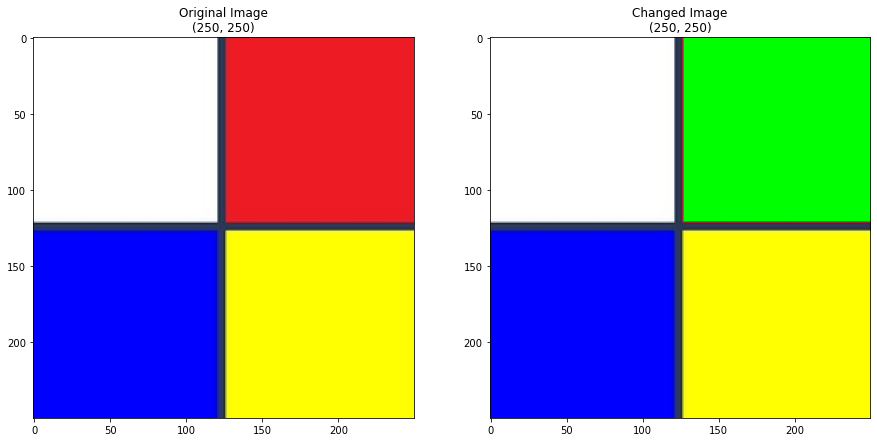

In [6]:
plt.figure(figsize=(15,15)) 
plt.imshow(cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB))

in_point = plt.ginput(1)
in_point = tuple(map(int, in_point[0]))
in_point = (in_point[1], in_point[0])
print('The point = {}'.format(in_point))
new_img = Color_Change(src_img, w=50, point=in_point, new_color=[0, 255, 0])

%pylab inline
# Show the image with matplotlib
Show_Images(img_list=[src_img, new_img], 
            label=['Original Image', 'Changed Image'], 
            fig_size=(15,15))